In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.table import Table
import astropy.units as u
import astropy.coordinates as coord

import gala.coordinates as gc
import gala.potential as gp
import gala.dynamics as gd
import galstreams

# from scipy.optimize import minimize
# from scipy.interpolate import InterpolatedUnivariateSpline

# import emcee
# from multiprocessing import Pool
import corner
import pickle

%matplotlib inline

In [2]:
plt.style.use('notebook')

In [3]:
tc = Table.read('../data/stream_endpoints_5d.fits')

In [4]:
print(list(tc['name']), len(tc))

['ATLAS', 'Aliqa Uma', 'Chenab', 'Elqui', 'Fimbulthul', 'Fj\\"{o}rm', 'Gj\\"{o}ll', 'Indus', 'Leiptr', 'Phoenix', 'Ravi', 'Slidr', 'Sv\\"{o}l', 'Sylgr', 'Tucana III', 'Turbio', 'Turranburra', 'Wambelong', 'Willka Yaku', 'Ylgr'] 20


In [6]:
tc

name,ra [2],dec [2],dec_err [2],d [2],d_err [2],pmra [2],pmdec [2],pm_err [2]
,deg,deg,deg,kpc,kpc,mas / yr,mas / yr,mas / yr
bytes11,float64,float64,float64,float64,float64,float64,float64,float64
ATLAS,9.3 .. 30.7,-20.9 .. -33.2,0.24 .. 0.24,22.9 .. 22.9,4.58 .. 4.58,-0.1 .. -0.1,-1.0 .. -1.0,1.0 .. 1.0
Aliqa Uma,31.7 .. 40.6,-31.5 .. -38.3,0.26 .. 0.26,28.8 .. 28.8,5.76 .. 5.76,0.3 .. 0.3,-0.6 .. -0.6,1.0 .. 1.0
Chenab,-40.7 .. -28.3,-59.9 .. -43.0,0.71 .. 0.71,39.8 .. 39.8,7.96 .. 7.96,0.3 .. 0.3,-2.4 .. -2.4,1.0 .. 1.0
Elqui,10.7 .. 20.6,-36.9 .. -42.4,0.54 .. 0.54,50.1 .. 50.1,10.02 .. 10.02,0.1 .. 0.1,-0.4 .. -0.4,1.0 .. 1.0
Fimbulthul,198.74 .. 214.23,-29.56 .. -22.76,0.5 .. 0.5,4.22 .. 4.22,0.01 .. 0.01,-8.2 .. -18.9,-8.1 .. -12.8,1.0 .. 1.0
"Fj\""{o}rm",197.37 .. 250.88,5.55 .. 64.2,0.5 .. 0.5,4.9 .. 4.9,0.07 .. 0.07,-2.5 .. 2.2,4.0 .. 5.2,1.0 .. 1.0
"Gj\""{o}ll",70.16 .. 90.05,-2.46 .. -20.15,0.5 .. 0.5,3.38 .. 3.38,0.1 .. 0.1,21.7 .. 24.1,-22.1 .. -22.4,1.0 .. 1.0
Indus,-36.3 .. -8.0,-50.7 .. -64.8,0.83 .. 0.83,16.6 .. 16.6,3.32 .. 3.32,3.5 .. 3.5,-5.4 .. -5.4,1.0 .. 1.0


In [5]:
ham = gp.Hamiltonian(gp.MilkyWayPotential())
coord.galactocentric_frame_defaults.set('v4.0')
gc_frame = coord.Galactocentric()

In [16]:
ra = coord.Angle(tc['ra']+40*u.deg).to(u.rad).wrap_at(180*u.deg)
dec = coord.Angle(tc['dec']).to(u.rad)

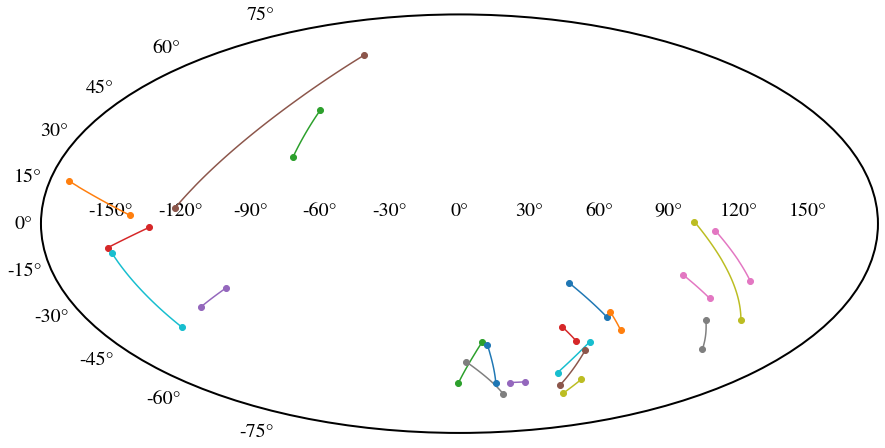

In [21]:
plt.figure(figsize=(15,10))
plt.subplot(111,projection='mollweide')

for i in range(len(tc)):
    plt.plot(ra[i], dec[i], '-o')